PyImageJ Tutorial
===

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including NumPy, SciPy, scikit-image, CellProfiler, OpenCV, ITK and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the other notebooks.

## 2 A simple example: `ij.py.show()` and `ij.ui().show()`

PyImageJ can display NumPy images and some* ImageJ Java images using `matplotlib.pyplot.imshow` with`ij.py.show()`. You can also open some images in an ImageJ window with `ij.ui().show()`. Let's demonstrate both methods,first initialize PyImageJ:

*: Both `ij.py.show()` and `ij.ui().show()` have limitations in dispaying image data. Briefly, `ij.py.show()` expects a 2D NumPy or ImageJ image, while `ij.ui().show()` expects an ImageJ image. For more information view the examples below.

In [14]:
import imagej

# initialize ImageJ in interactive mode
ij = imagej.init(mode='interactive')
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.3.0/Inactive


### 2.1 `ij.py.show()` 

`ij.py.show()` displays images with `matplotlib.pyplot.imshow` behind the scenes. You can use either Python images (_e.g._ `np.ndarray`, `xarray.DataArray`) or ImageJ/Java images (_e.g._ `net.imagej.Dataset`, `net.imglib2.RandomAccessibleInterval`) so long as they are 2D image. >2D image data is not supported by `matplotlib.pyplot`. Let's open a couple different image data types and display them with `ij.py.show()`:

**`skimage` 2D**


View image data from `sckimage`.

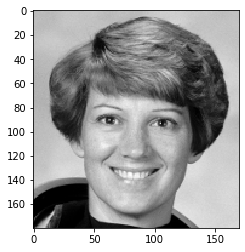

In [15]:
import skimage
import numpy as np

img = skimage.data.astronaut()
img = np.mean(img[10:190,140:310], axis=2)

ij.py.show(img, cmap = 'gray')

#### `net.imagej.Dataset` 2D

View an ImageJ `Dataset`.

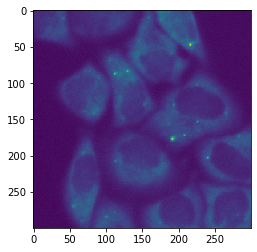

In [16]:
dataset_2d = ij.io().open('sample-data/test_still.tif')
ij.py.show(dataset_2d)

#### `net.imagej.Dataset` 4D

Image data that is >2D can't be displayed with `ij.py.show()` all at once, however you can display individual slices of the data like so:

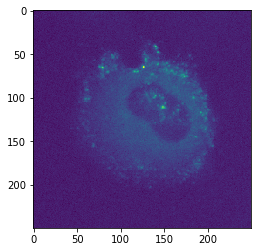

In [17]:
dataset_4d = ij.io().open('sample-data/test_timeseries.tif')
ij.py.show(dataset_4d[:, :, 2, 10]) # channel 2, frame 10

#### `xarray.DataArray` 4D

The same can be done with >2D `xarray.DataArray`s:

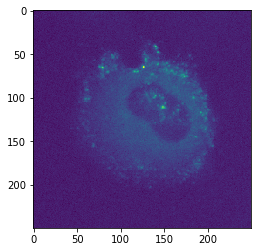

In [18]:
# get xarray from dataset
xarr_4d = ij.py.from_java(dataset_4d)
ij.py.show(xarr_4d[10, :, :, 2]) # channel 2, frame 10

### 2.2 `ij.ui().show()`

`ij.ui().show()` displays images with ImageJ's image viewer. Unlike `ij.py.show()`, `ij.ui().show()` only accepts ImageJ/Java images (_e.g._ `net.imagej.Dataset`, `net.imagej.ImgPlus`, `net.imglib2.RandomAccessibleInterval`). Eventhough `ij.ui().show()` only accepts Java objects, it can display > 2D image data. In order to display your NumPy/xarray data with ImageJ's viewer, convert your data to Java first with `ij.py.to_java()` before displaying it with `ij.ui().show()`.

**Important**: This section of the notebook only works locally (_i.e._ not on online on Binder) and requires either the `mode='interactive'` or `mode='gui'` initialization parameters to be set).

#### `skimage` 2D

View image data from `sckimage`.

In [19]:
import skimage
import numpy as np

img = skimage.data.astronaut()
img = np.mean(img[10:190,140:310], axis=2)
java_img = ij.py.to_java(img)

ij.ui().show(java_img)

[java.lang.Enum.toString] [INFO] Found 10 JHotDraw adapters.
[java.lang.Enum.toString] [INFO] Found 10 JHotDraw adapters.
[java.lang.Enum.toString] [ERROR] Exception during event handling:
	[Event] org.scijava.display.event.input.MsMovedEvent
	context = org.scijava.Context@11a74b8b
	consumed = false
	display = null
	modifiers = 
	x = 0
	y = 101
	[Subscriber] org.scijava.tool.DefaultToolService [priority = 0.0]
	[Method] protected void org.scijava.tool.DefaultToolService.onEvent(org.scijava.display.event.input.MsMovedEvent)
java.lang.NullPointerException
	at net.imagej.legacy.display.LegacyImageDisplayService.getActiveImageDisplay(LegacyImageDisplayService.java:117)
	at net.imagej.plugins.tools.PixelProbe.onMouseMove(PixelProbe.java:73)
	at org.scijava.tool.DefaultToolService.onEvent(DefaultToolService.java:235)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMetho

#### `net.imagej.Dataset` 2D

View an ImageJ `Dataset`.

In [11]:
dataset_2d = ij.io().open('sample-data/test_still.tif')
ij.ui().show(dataset_2d)

#### `net.imagej.Dataset` 4D

ImageJ can view this 4D image data without slicing to specific frames.

In [12]:
dataset_4d = ij.io().open('sample-data/test_timeseries.tif')
ij.ui().show(dataset_4d)

#### `xarray.DataArray` 4D

`xarray.DataArray`s need to first be converted to Java before displaying with ImageJ.

In [13]:
# get xarray from dataset
xarr_4d = ij.py.from_java(dataset_4d)
new_dataset_4d = ij.py.to_java(xarr_4d)
ij.ui().show(new_dataset_4d)